In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
cars = pd.read_csv('../Data/cleaned_data_updated.csv') # read clean data

In [138]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           2886 non-null   int64  
 1   brand           2886 non-null   object 
 2   model           2886 non-null   object 
 3   year            2886 non-null   int64  
 4   condition       2886 non-null   object 
 5   transmission    2886 non-null   object 
 6   fuel_type       2886 non-null   object 
 7   kilometers_run  2886 non-null   int64  
 8   age             2886 non-null   int64  
 9   km_per_year     2886 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 225.6+ KB


In [139]:
cars.head()

,price,brand,model,year,condition,transmission,fuel_type,kilometers_run,age,km_per_year
0,2450000,toyota,fielder,2020,reconditioned,automatic,hybrid,86000,5,17200.000000
1,4500000,toyota,noah,2020,reconditioned,automatic,octane,68000,5,13600.000000
2,2750000,honda,cr-v,2012,used,automatic,octane,92000,13,7076.923077
3,1350000,toyota,passo,2010,used,automatic,"octane, lpg",87369,15,5824.600000
4,1760000,toyota,axio,2016,used,automatic,"hybrid, octane",66000,9,7333.333333


In [140]:
numeric_cols = ['price','year','kilometers_run']
categorical_cols = ['brand','model','condition','transmission','fuel_type']

In [141]:
for col in numeric_cols:
    cars[col] = pd.to_numeric(cars[col],errors='coerce')
    
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

In [142]:
cars.isnull().sum()

price             0
brand             0
model             0
year              0
condition         0
transmission      0
fuel_type         0
kilometers_run    0
age               0
km_per_year       0
dtype: int64

In [143]:
current_year = 2025
cars['age'] = current_year - cars['year'] # calculate car age

cars['km_per_year'] = cars['kilometers_run'] / cars['age'].replace(0,np.nan) # calculate km/year

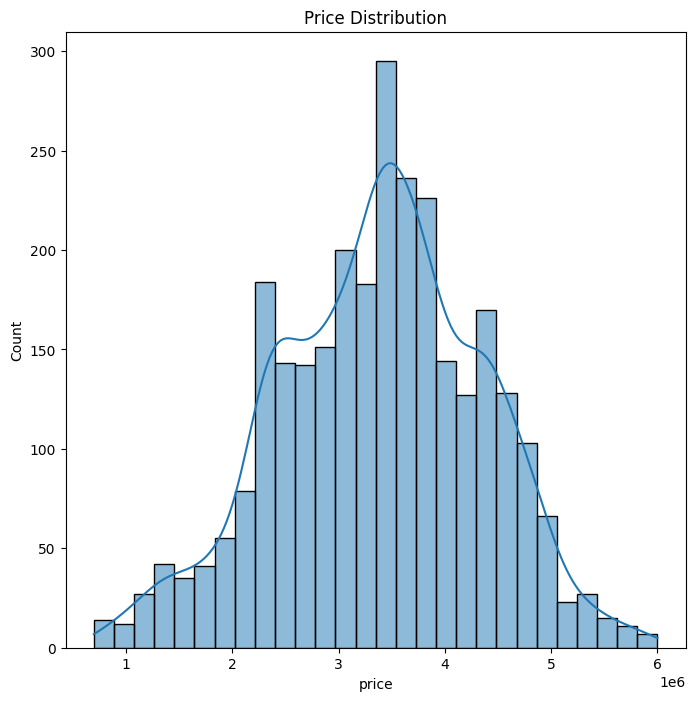

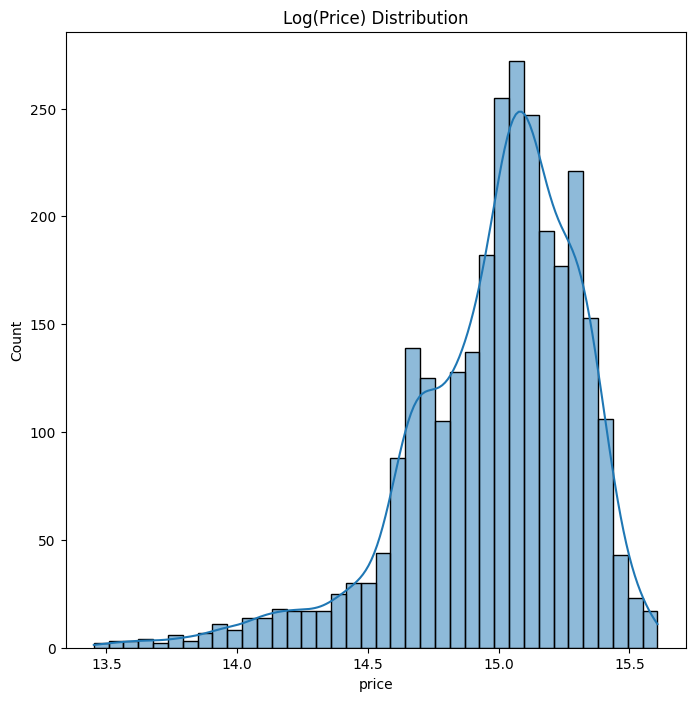

In [144]:
plt.figure(figsize=(8,8))
sns.histplot(cars['price'], kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(np.log1p(cars['price']), kde=True)
plt.title("Log(Price) Distribution")
plt.show()

In [145]:
numeric_cols = ['price','year','kilometers_run', 'age', 'km_per_year']

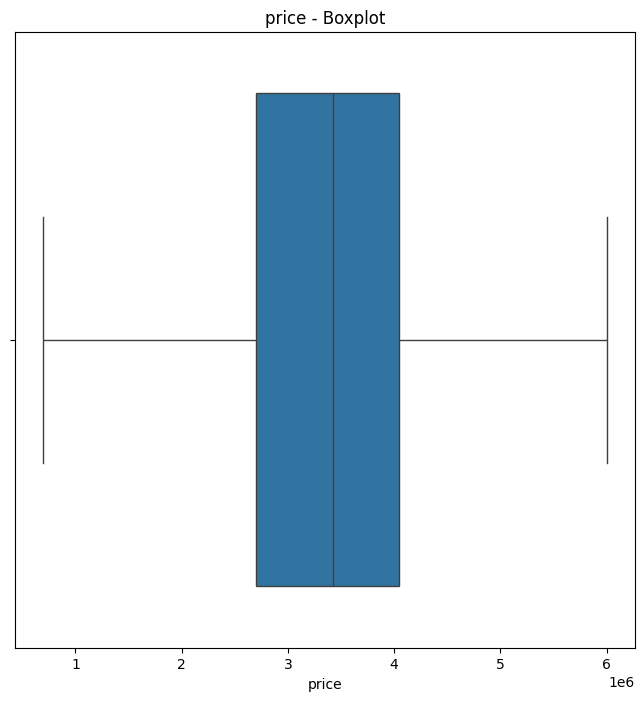


--- price Summary ---
count    2.886000e+03
mean     3.380676e+06
std      9.599674e+05
min      6.950000e+05
25%      2.700000e+06
50%      3.420000e+06
75%      4.050000e+06
max      6.000000e+06
Name: price, dtype: float64


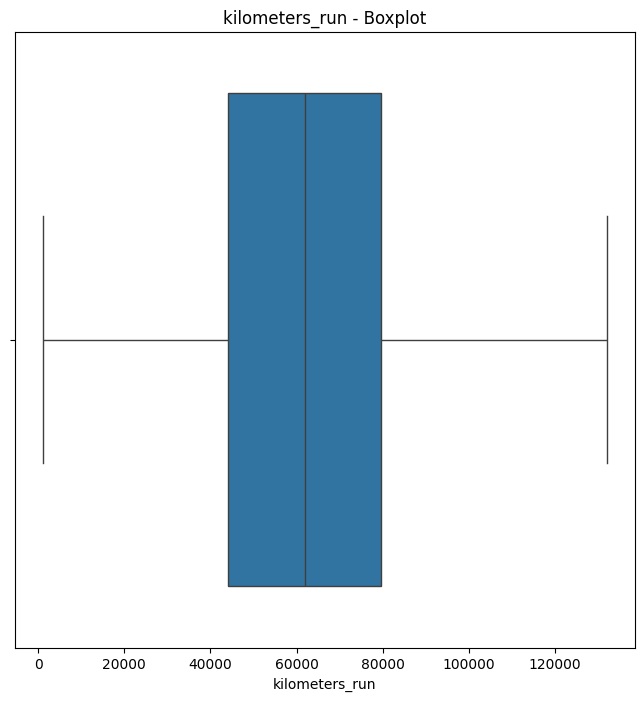


--- kilometers_run Summary ---
count      2886.000000
mean      61674.658004
std       25452.947721
min        1150.000000
25%       44000.000000
50%       62000.000000
75%       79515.000000
max      132000.000000
Name: kilometers_run, dtype: float64


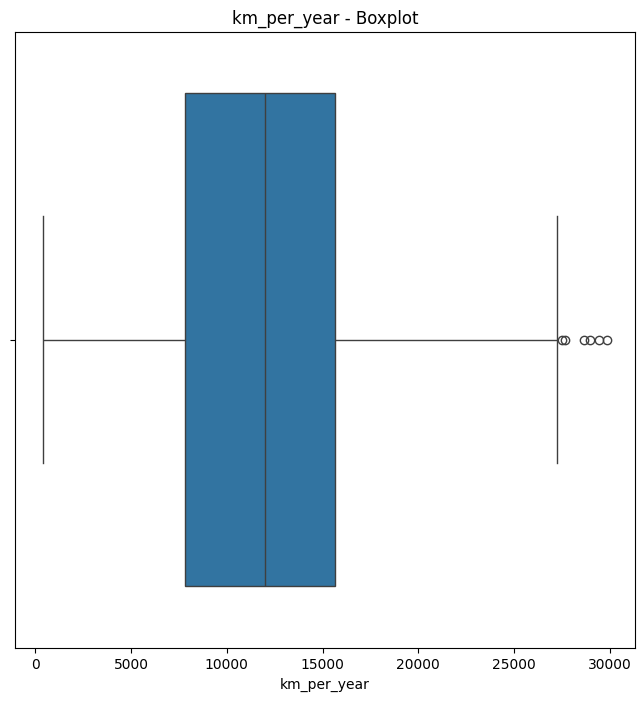


--- km_per_year Summary ---
count     2886.000000
mean     12023.642681
std       5457.822796
min        400.000000
25%       7824.983333
50%      11977.100000
75%      15666.916667
max      29846.000000
Name: km_per_year, dtype: float64


In [146]:
cols = ['price', 'kilometers_run', 'km_per_year']
for col in cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=cars[col])
    plt.title(f"{col} - Boxplot")
    plt.show()
    print(f"\n--- {col} Summary ---")
    print(cars[col].describe())

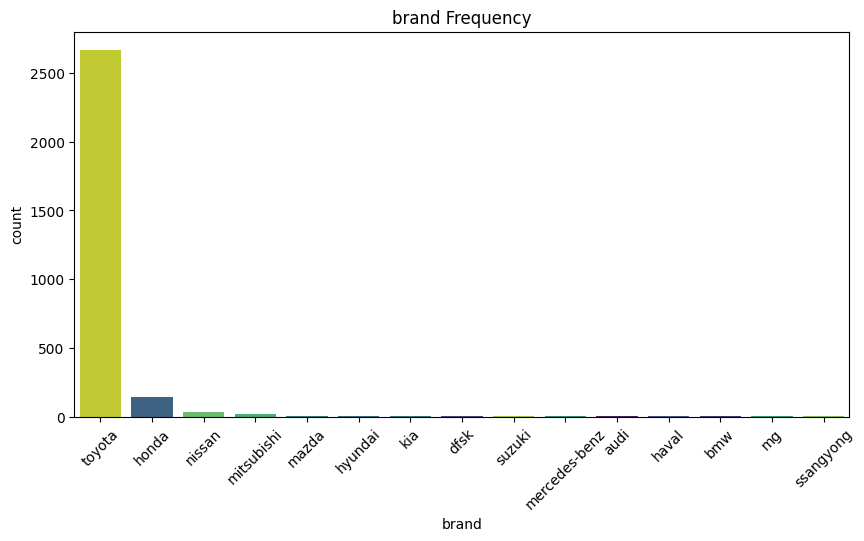

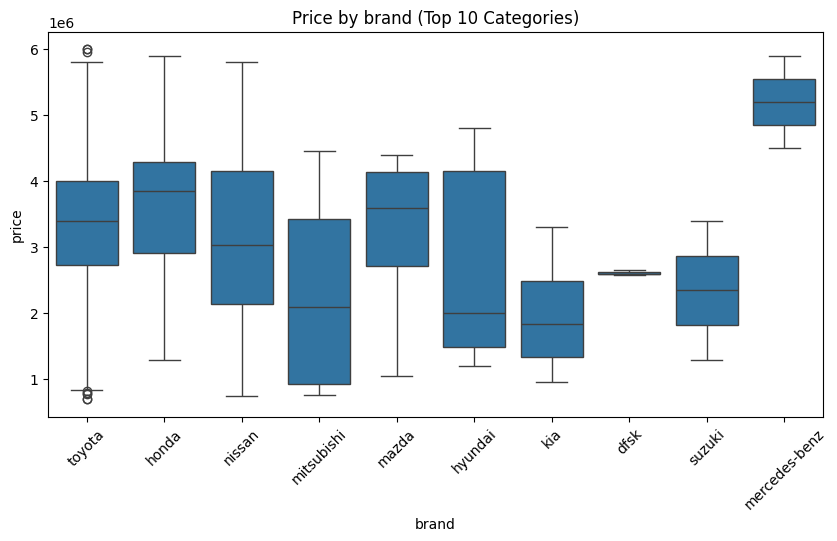

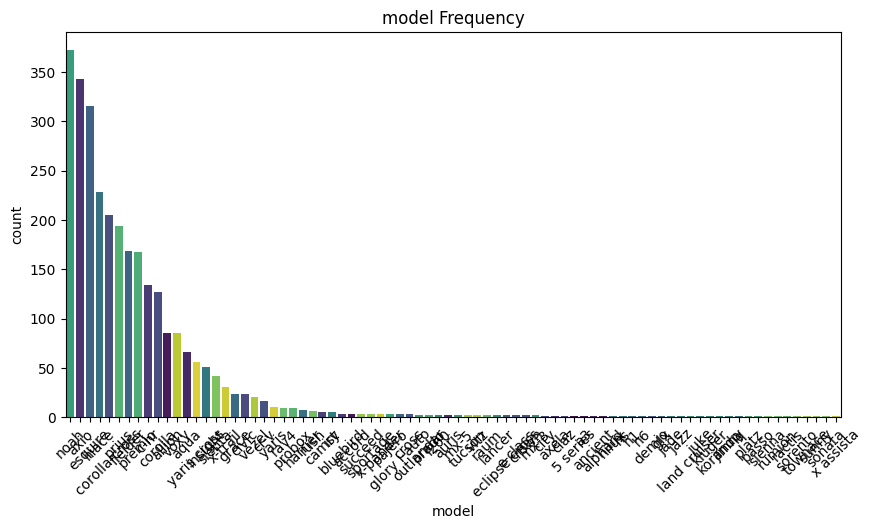

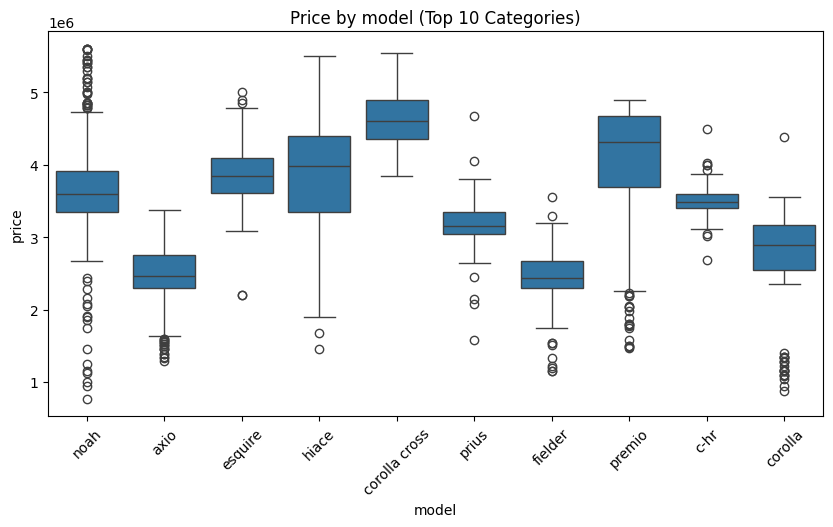

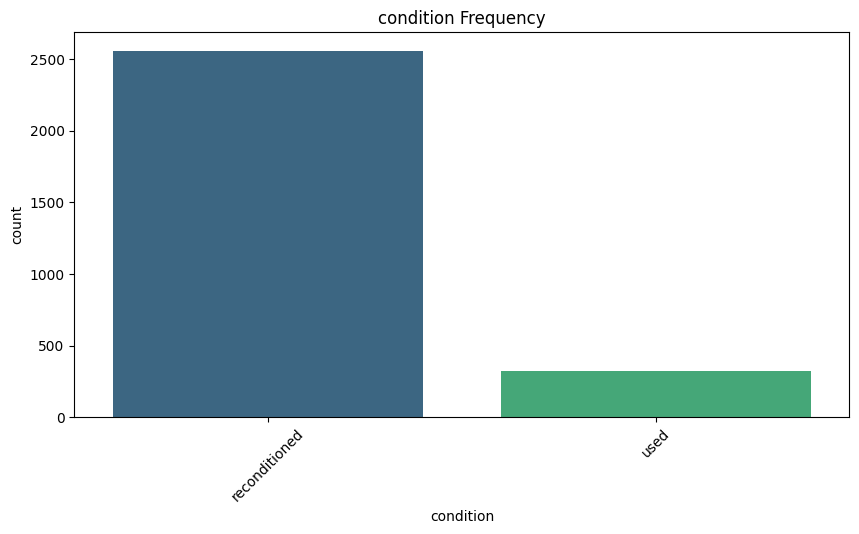

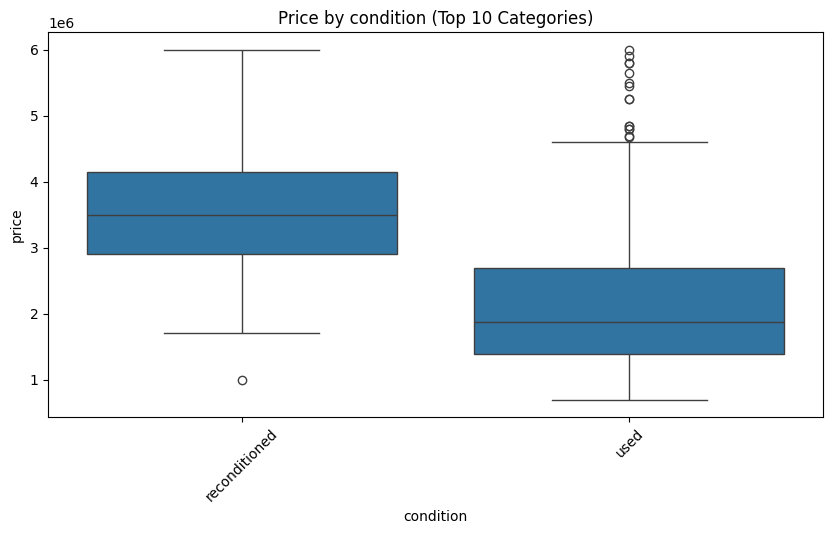

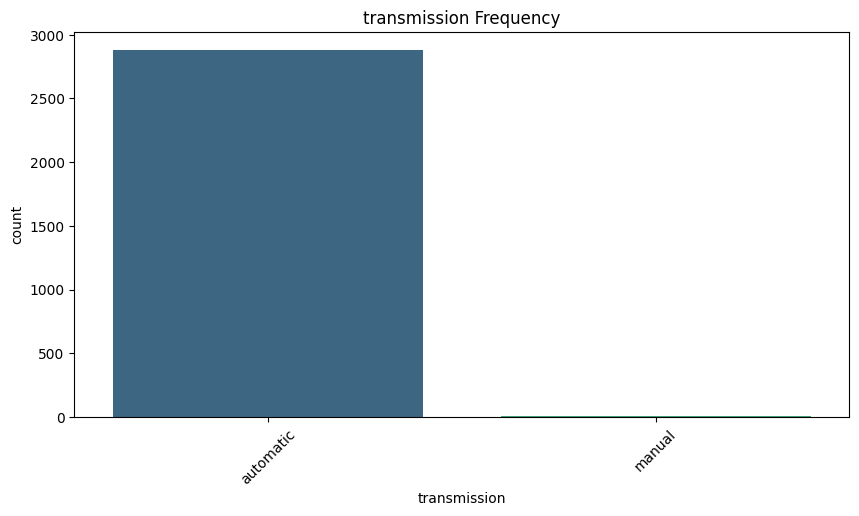

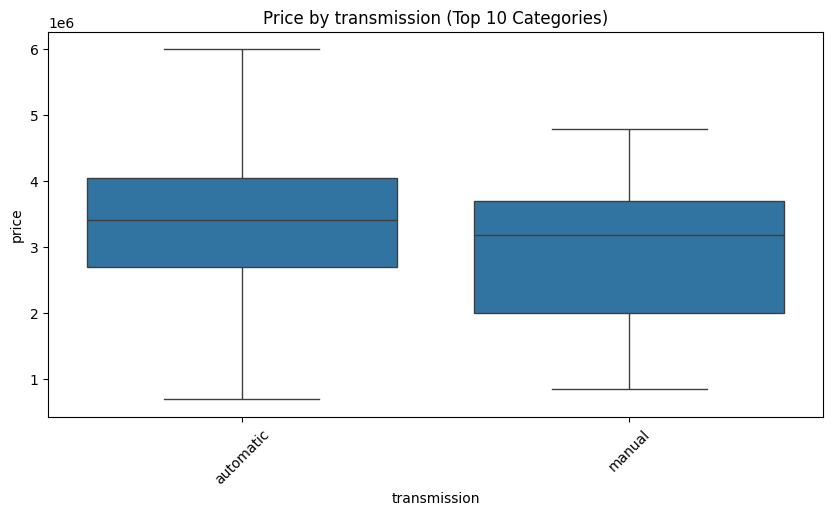

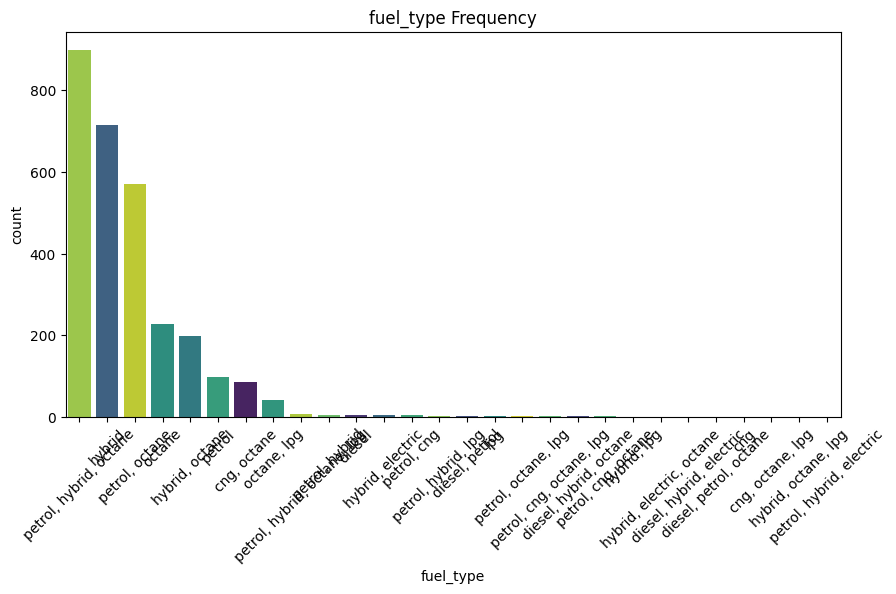

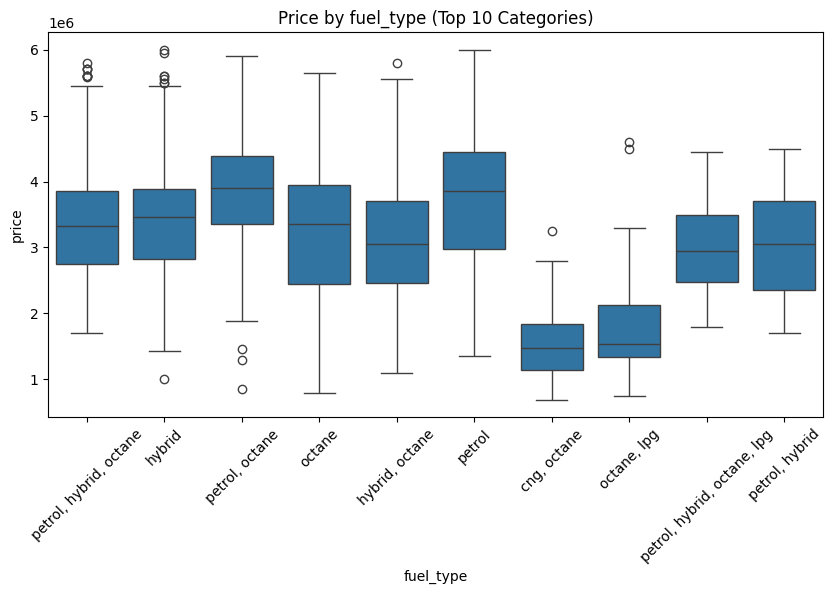

In [147]:
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    order = cars[col].value_counts().index
    sns.countplot(x=cars[col], order=order, palette="viridis", hue=cars[col], legend=False)
    plt.title(f"{col} Frequency")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10,5))
    top_categories = cars[col].value_counts().index[:10]
    sns.boxplot(x=cars[col], y=cars['price'], order=top_categories)
    plt.title(f"Price by {col} (Top 10 Categories)")
    plt.xticks(rotation=45)
    plt.show()

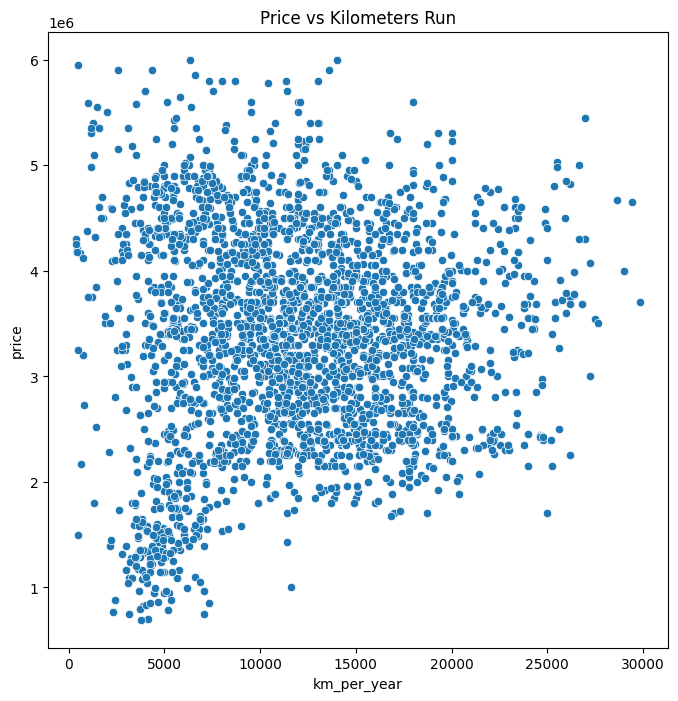

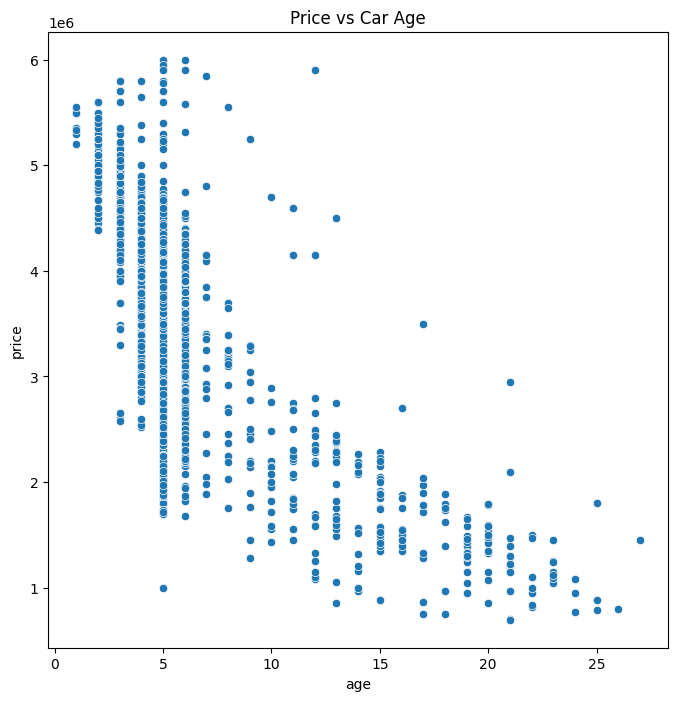

In [148]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='km_per_year', y='price', data=cars)
plt.title("Price vs Kilometers Run")
plt.show()

plt.figure(figsize=(8,8))
sns.scatterplot(x='age', y='price', data=cars)
plt.title("Price vs Car Age")
plt.show()

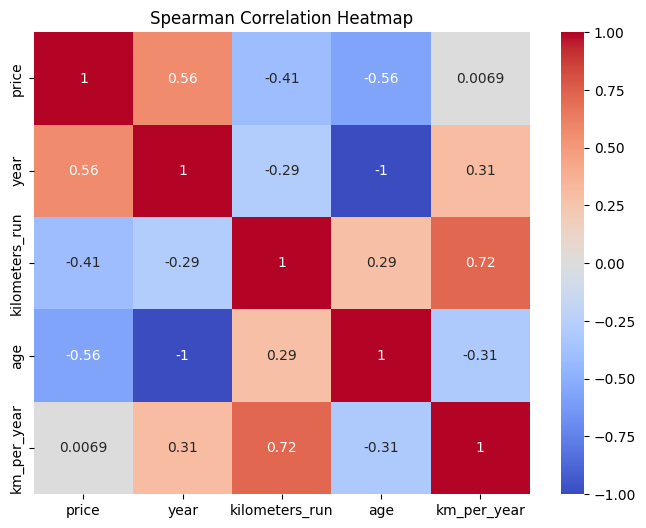

In [149]:
plt.figure(figsize=(8,6))
corr = cars[['price', 'year', 'kilometers_run', 'age', 'km_per_year']].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Heatmap")
plt.show()

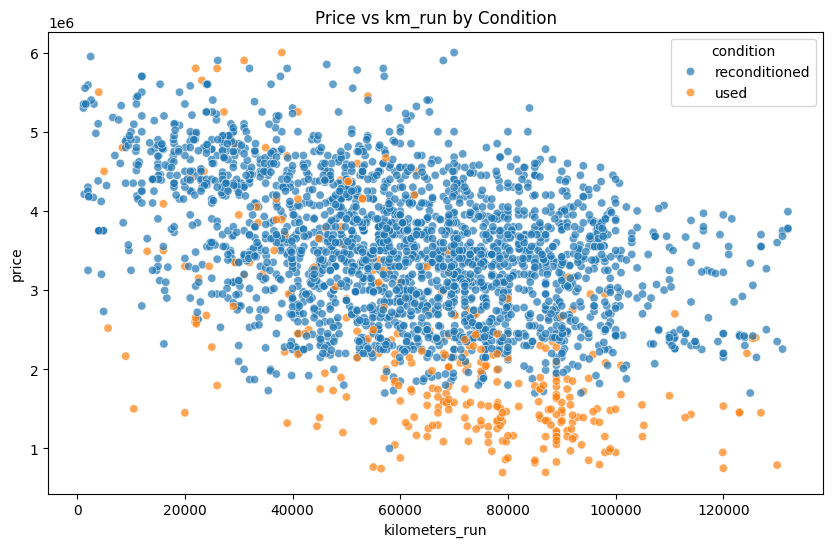

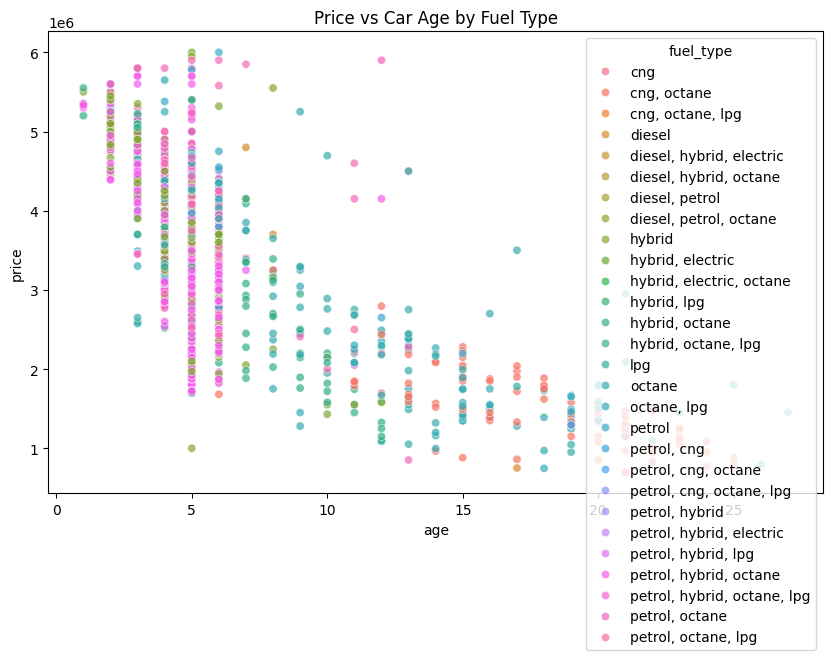

In [150]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='kilometers_run', y='price', hue='condition', data=cars, alpha=0.7)
plt.title("Price vs km_run by Condition")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='price', hue='fuel_type', data=cars, alpha=0.7)
plt.title("Price vs Car Age by Fuel Type")
plt.show()


In [151]:
# remove outliners using IQR
def remove_outliers_iqr(cars, column):
    Q1 = cars[column].quantile(0.25)
    Q3 = cars[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return cars[(cars[column] >= lower) & (cars[column] <= upper)]

cars = remove_outliers_iqr(cars, 'price')
cars = remove_outliers_iqr(cars, 'kilometers_run')

# remove outliers excluding unrealisting values
cars = cars[(cars['kilometers_run'] > 1000)]
cars = cars[(cars['km_per_year'] < 30000)]


# remove rows with null values
cars.dropna(inplace=True)


In [152]:
cars.to_csv('../Data/cleaned_data_updated.csv', index=False)
cars.head()

,price,brand,model,year,condition,transmission,fuel_type,kilometers_run,age,km_per_year
0,2450000,toyota,fielder,2020,reconditioned,automatic,hybrid,86000,5,17200.000000
1,4500000,toyota,noah,2020,reconditioned,automatic,octane,68000,5,13600.000000
2,2750000,honda,cr-v,2012,used,automatic,octane,92000,13,7076.923077
3,1350000,toyota,passo,2010,used,automatic,"octane, lpg",87369,15,5824.600000
4,1760000,toyota,axio,2016,used,automatic,"hybrid, octane",66000,9,7333.333333


In [153]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           2886 non-null   int64   
 1   brand           2886 non-null   category
 2   model           2886 non-null   category
 3   year            2886 non-null   int64   
 4   condition       2886 non-null   category
 5   transmission    2886 non-null   category
 6   fuel_type       2886 non-null   category
 7   kilometers_run  2886 non-null   int64   
 8   age             2886 non-null   int64   
 9   km_per_year     2886 non-null   float64 
dtypes: category(5), float64(1), int64(4)
memory usage: 131.8 KB
